In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
customer_data = pd.read_csv("Mall_Customers.csv")
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# customer_data.drop(['CustomerID'], axis = 1, inplace= True)
# customer_data.head()

In [11]:
customer_data['Age'].describe().round(4)

count    200.000
mean      38.850
std       13.969
min       18.000
25%       28.750
50%       36.000
75%       49.000
max       70.000
Name: Age, dtype: float64

In [12]:
customer_data['Annual Income (k$)'].describe().round(4)

count    200.0000
mean      60.5600
std       26.2647
min       15.0000
25%       41.5000
50%       61.5000
75%       78.0000
max      137.0000
Name: Annual Income (k$), dtype: float64

In [13]:
customer_data['Spending Score (1-100)'].std().round(5)

25.82352

In [14]:
gender_counts = customer_data['Gender'].value_counts()
gender_counts

Gender
Female    112
Male       88
Name: count, dtype: int64

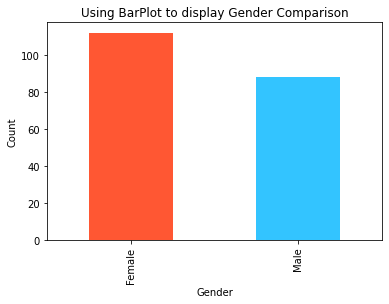

In [15]:
gender_counts.plot(kind='bar', color=['#FF5733', '#33C4FF'])
plt.title("Using BarPlot to display Gender Comparison")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()

In [16]:
pct = round(gender_counts / gender_counts.sum() * 100)
pct

Gender
Female    56.0
Male      44.0
Name: count, dtype: float64

In [17]:
labels = [f"{gender} {p}%" for gender, p in zip(pct.index, pct)]
labels

['Female 56.0%', 'Male 44.0%']

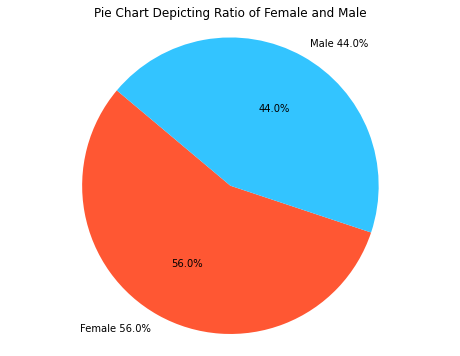

In [18]:
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#FF5733', '#33C4FF'])
plt.title("Pie Chart Depicting Ratio of Female and Male")
plt.axis('equal')
plt.show()

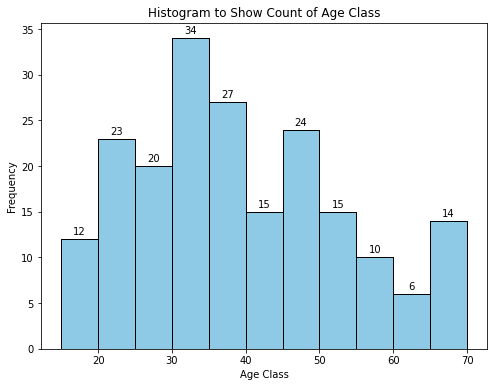

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(customer_data['Age'], bins=list(range(15, 75, 5)), edgecolor='black', color='#8ecae6')
plt.title("Histogram to Show Count of Age Class")
plt.xlabel("Age Class")
plt.ylabel("Frequency")
n, bins, patches = plt.hist(customer_data['Age'], bins=list(range(15, 75, 5)), edgecolor='black', color='#8ecae6')
for i, patch in enumerate(patches):
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 0.5, str(int(n[i])), ha='center')
plt.show()

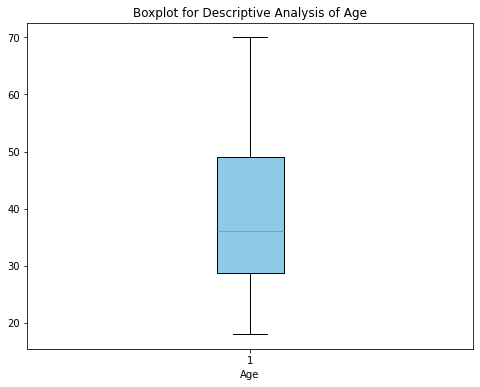

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot(customer_data['Age'], patch_artist=True, boxprops=dict(facecolor='#8ecae6'))
plt.title("Boxplot for Descriptive Analysis of Age")
plt.xlabel("Age")
plt.ylabel("")
plt.show()

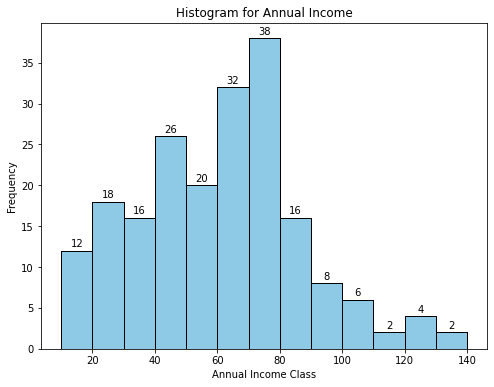

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(customer_data['Annual Income (k$)'], bins=list(range(10, 150, 10)), edgecolor='black', color='#8ecae6')
plt.title("Histogram for Annual Income")
plt.xlabel("Annual Income Class")
plt.ylabel("Frequency")
n, bins, patches = plt.hist(customer_data['Annual Income (k$)'], bins=list(range(10, 150, 10)), edgecolor='black', color='#8ecae6')
for i, patch in enumerate(patches):
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 0.5, str(int(n[i])), ha='center')
plt.show()

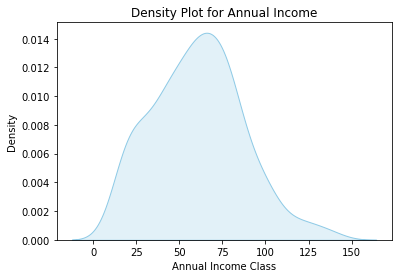

In [22]:
density = sns.kdeplot(customer_data['Annual Income (k$)'], shade=True, color='#8ecae6')
plt.title("Density Plot for Annual Income")
plt.xlabel("Annual Income Class")
plt.ylabel("Density")
plt.show()

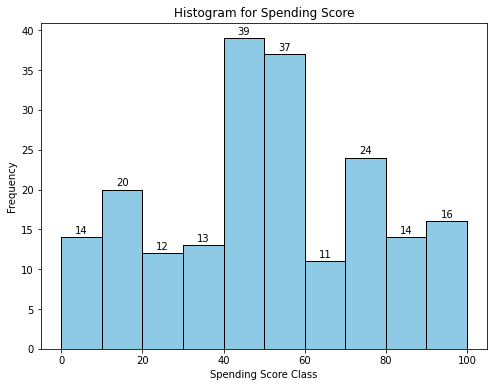

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(customer_data['Spending Score (1-100)'], bins=list(range(0, 110, 10)), color='#8ecae6', edgecolor='black')
plt.title("Histogram for Spending Score")
plt.xlabel("Spending Score Class")
plt.ylabel("Frequency")
n, bins, patches = plt.hist(customer_data['Spending Score (1-100)'], bins=list(range(0, 110, 10)), edgecolor='black', color='#8ecae6')
for i, patch in enumerate(patches):
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 0.5, str(int(n[i])), ha='center')
plt.show()

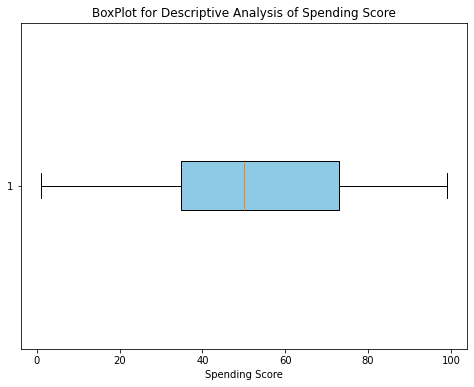

In [24]:
plt.figure(figsize=(8, 6))
plt.boxplot(customer_data['Spending Score (1-100)'], vert=False, patch_artist=True, boxprops=dict(facecolor='#8ecae6'))
plt.title("BoxPlot for Descriptive Analysis of Spending Score")
plt.xlabel("Spending Score")
plt.ylabel("")
plt.show()

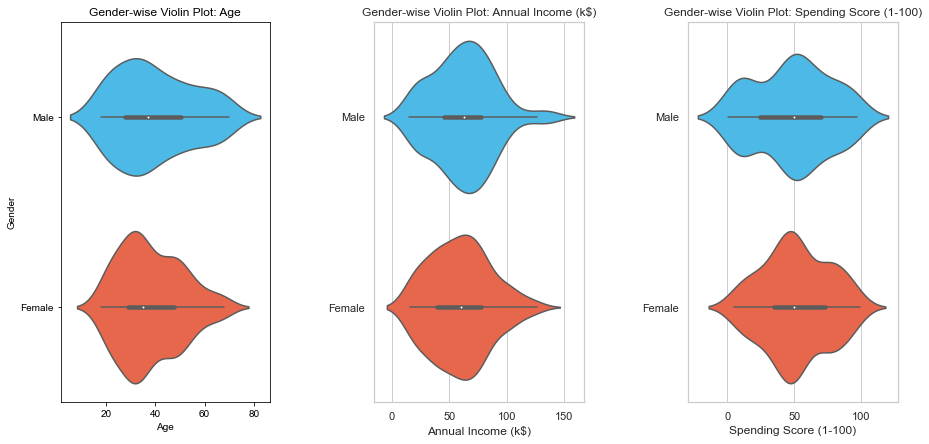

In [25]:
plt.figure(1, figsize=(15,7))
n = 0
palette = {'Male': '#33C4FF', 'Female': '#FF5733'}
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Gender', data=customer_data, palette=palette)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title(f'Gender-wise Violin Plot: {cols}')
plt.show()

In [26]:
age_18_25 = customer_data.Age[(customer_data.Age >= 18) & (customer_data.Age <= 25)]
age_18_25

0      19
1      21
2      20
3      23
5      22
7      23
13     24
15     22
17     20
21     25
29     23
31     21
33     18
35     21
39     20
41     24
45     24
61     19
65     18
68     19
78     23
84     21
87     22
91     18
95     24
99     20
100    23
105    21
111    19
113    19
114    18
115    19
124    23
132    25
134    20
138    19
144    25
162    19
Name: Age, dtype: int64

In [27]:
age_26_35 = customer_data.Age[(customer_data.Age >= 26) & (customer_data.Age <= 35)]
age_26_35

4      31
6      35
9      30
11     35
16     35
19     35
20     35
23     31
25     29
27     35
37     30
43     31
47     27
48     29
49     31
51     33
52     31
58     27
69     32
75     26
88     34
94     32
97     27
103    26
120    27
125    31
133    31
135    29
137    32
139    35
141    32
142    28
143    32
145    28
147    32
148    34
149    34
155    27
157    30
158    34
159    30
161    29
163    31
167    33
169    32
171    28
175    30
177    27
179    35
181    32
183    29
185    30
187    28
190    34
191    32
192    33
195    35
197    32
198    32
199    30
Name: Age, dtype: int64

In [28]:
age_36_45 = customer_data.Age[(customer_data.Age >= 36) & (customer_data.Age <= 45)]
age_36_45

14     37
26     45
28     40
36     42
38     36
66     43
76     45
77     40
81     38
93     40
112    38
121    38
122    40
123    39
126    43
127    40
129    38
131    39
136    44
150    43
151    39
152    44
153    38
156    37
165    36
166    42
168    36
170    40
172    36
173    36
180    37
184    41
188    41
189    36
193    38
196    45
Name: Age, dtype: int64

In [29]:
age_46_55 = customer_data.Age[(customer_data.Age >= 46) & (customer_data.Age <= 55)]
age_46_55

18     52
22     46
24     54
32     53
34     49
42     48
44     49
46     50
50     49
54     50
55     47
56     51
59     53
63     54
71     47
79     49
83     46
85     48
86     55
89     50
92     48
96     47
98     48
101    49
104    49
107    54
117    49
118    51
119    50
130    47
146    48
154    47
164    50
174    52
182    46
186    54
194    47
Name: Age, dtype: int64

In [30]:
age_above_55 = customer_data.Age[(customer_data.Age >= 56)]
age_above_55

8      64
10     67
12     58
30     60
40     65
53     59
57     69
60     70
62     67
64     63
67     68
70     70
72     60
73     60
74     59
80     57
82     67
90     68
102    67
106    66
108    68
109    66
110    65
116    63
128    59
140    57
160    56
176    58
178    59
Name: Age, dtype: int64

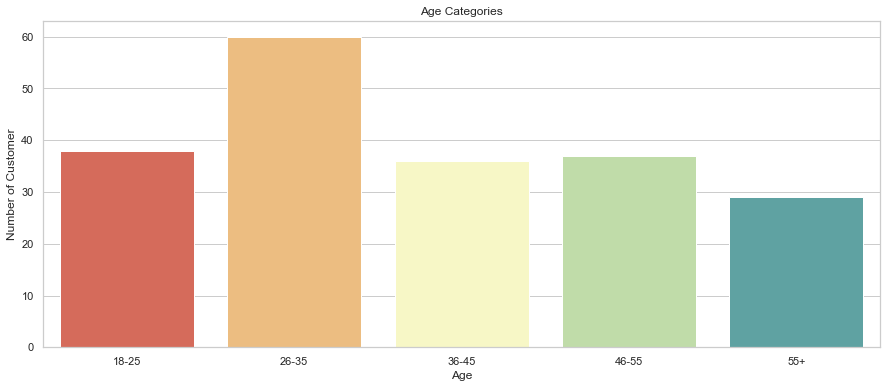

In [31]:
agex = ['18-25', '26-35', '36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]
plt.figure(figsize = (15,6))
sns.barplot(x = agex, y = agey , palette='Spectral')
plt.title('Age Categories')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

In [32]:
ss_1_20 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 1) & (customer_data['Spending Score (1-100)'] <= 20)]
ss_1_20

2       6
6       6
8       3
10     14
12     15
14     13
22      5
24     14
30      4
32      4
34     14
36     17
128    11
130     9
134     5
136     7
138    10
140     5
144    12
150    17
152    20
154    16
156     1
158     1
162     5
166    20
170    13
172    10
174    13
176    15
178    14
182    15
188    17
192     8
194    16
198    18
Name: Spending Score (1-100), dtype: int64

In [33]:
ss_21_40 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 21) & (customer_data['Spending Score (1-100)'] <= 40)]
ss_21_40

0      39
4      40
16     35
18     29
20     35
26     32
28     31
38     26
40     35
42     36
44     28
93     40
121    40
124    29
126    35
132    34
142    40
146    36
148    22
160    35
164    26
168    27
180    32
184    39
186    24
190    23
196    28
Name: Spending Score (1-100), dtype: int64

In [34]:
ss_41_60 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 41) & (customer_data['Spending Score (1-100)'] <= 60)]
ss_41_60

46     55
47     47
48     42
49     42
50     52
       ..
117    59
118    43
119    57
120    56
122    58
Name: Spending Score (1-100), Length: 75, dtype: int64

In [35]:
ss_61_80 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 61) & (customer_data['Spending Score (1-100)'] <= 80)]
ss_61_80

3      77
5      76
9      72
13     77
15     79
17     66
21     73
23     73
27     61
31     73
37     73
39     75
43     61
45     65
125    77
129    75
131    75
133    71
137    73
139    72
147    74
153    76
157    78
159    73
165    75
169    63
171    75
177    69
187    68
191    69
195    79
197    74
Name: Spending Score (1-100), dtype: int64

In [36]:
ss_81_100 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 81) & (customer_data['Spending Score (1-100)'] <= 100)]
ss_81_100

1      81
7      94
11     99
19     98
25     82
29     87
33     92
35     81
41     92
123    91
127    95
135    88
141    93
143    87
145    97
149    90
151    88
155    89
161    83
163    93
167    95
173    92
175    86
179    90
181    86
183    88
185    97
189    85
193    91
199    83
Name: Spending Score (1-100), dtype: int64

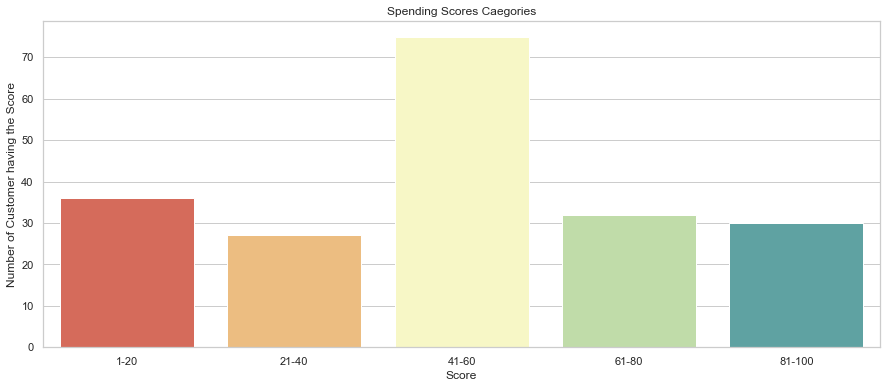

In [37]:
ssx = ['1-20','21-40','41-60','61-80','81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x = ssx, y = ssy, palette='Spectral')
plt.title('Spending Scores Caegories')
plt.xlabel('Score')
plt.ylabel('Number of Customer having the Score')
plt.show()

In [38]:
ann_0_30 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 0 ) & (customer_data['Annual Income (k$)'] <= 30)]
ann_0_30

0     15
1     15
2     16
3     16
4     17
5     17
6     18
7     18
8     19
9     19
10    19
11    19
12    20
13    20
14    20
15    20
16    21
17    21
18    23
19    23
20    24
21    24
22    25
23    25
24    28
25    28
26    28
27    28
28    29
29    29
30    30
31    30
Name: Annual Income (k$), dtype: int64

In [39]:
ann_31_60 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 31 ) & (customer_data['Annual Income (k$)'] <= 60)]
ann_31_60

32    33
33    33
34    33
35    33
36    34
      ..
93    60
94    60
95    60
96    60
97    60
Name: Annual Income (k$), Length: 66, dtype: int64

In [40]:
ann_61_90 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 61 ) & (customer_data['Annual Income (k$)'] <= 90)]
ann_61_90

98     61
99     61
100    62
101    62
102    62
       ..
173    87
174    88
175    88
176    88
177    88
Name: Annual Income (k$), Length: 80, dtype: int64

In [41]:
ann_91_120 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 91 ) & (customer_data['Annual Income (k$)'] <= 120)]
ann_91_120

178     93
179     93
180     97
181     97
182     98
183     98
184     99
185     99
186    101
187    101
188    103
189    103
190    103
191    103
192    113
193    113
194    120
195    120
Name: Annual Income (k$), dtype: int64

In [42]:
ann_121_150 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 121 ) & (customer_data['Annual Income (k$)'] <= 150)]
ann_121_150

196    126
197    126
198    137
199    137
Name: Annual Income (k$), dtype: int64

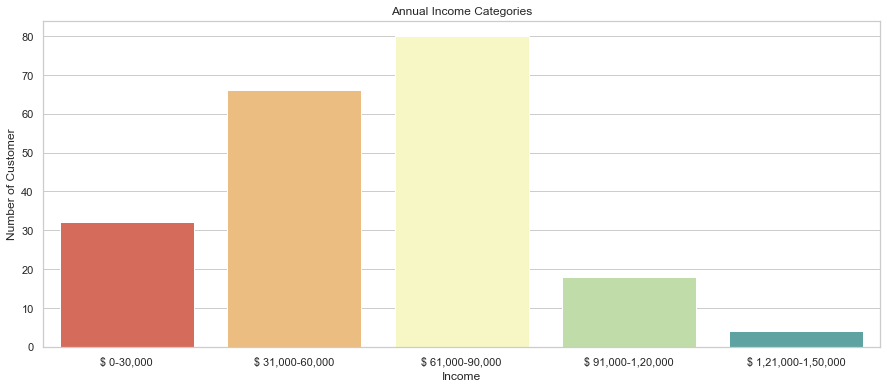

In [43]:
annx = ['$ 0-30,000','$ 31,000-60,000','$ 61,000-90,000','$ 91,000-1,20,000','$ 1,21,000-1,50,000']
anny = [len(ann_0_30.values),len(ann_31_60.values),len(ann_61_90.values),len(ann_91_120.values),len(ann_121_150.values)]
plt.figure(figsize=(15,6))
sns.barplot(x = annx, y = anny, palette='Spectral')
plt.title('Annual Income Categories')
plt.xlabel('Income')
plt.ylabel('Number of Customer')
plt.show()

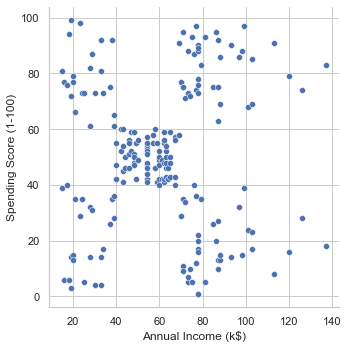

In [44]:
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = customer_data)

In [45]:
X = customer_data.iloc[:, [2, 3, 4]].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [46]:
def iss(k):
    kmeans = KMeans(n_clusters=k, init='random', n_init=100, max_iter=100, random_state=123)
    kmeans.fit(X)
    return kmeans.inertia_

k_values = range(1, 11)
iss_values = [iss(k) for k in k_values]
iss_values

[308812.77999999997,
 212840.16982097187,
 143342.75157170597,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51082.54296792137,
 44307.87341670445,
 40598.88048783458,
 37529.77292495438]

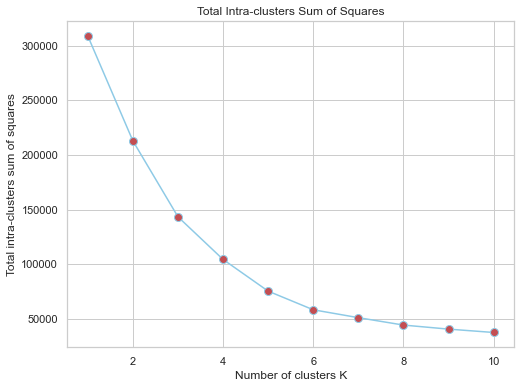

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, iss_values, marker='o', linestyle='-', color='#8ecae6', markerfacecolor='r', markersize=8)
plt.title('Total Intra-clusters Sum of Squares')
plt.xlabel('Number of clusters K')
plt.ylabel('Total intra-clusters sum of squares')
plt.grid(True)
plt.show()

In [48]:
def calculate_silhouette_scores(X, k_range):
    silhouette_scores = []
    for k in k_range:
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=123)
        cluster_labels = km.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

In [49]:
def plot_silhouette(X, k):
    km = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=123)
    cluster_labels = km.fit_predict(X)    
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    fig, ax = plt.subplots()
    y_lower = 10    
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.Spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)        
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax.set_title("Silhouette plot for {} clusters".format(k))
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
    
    plt.show()

In [50]:
k_range = range(2, 11)
silhouette_scores = calculate_silhouette_scores(X, k_range)
silhouette_scores

[0.293166070535953,
 0.3839349967742105,
 0.40546302077733304,
 0.44364987032532566,
 0.4523443947724053,
 0.43507099338041777,
 0.4307991110543737,
 0.38481393087916216,
 0.4053316116581115]

In [51]:
silhouette_df = pd.DataFrame({'Number of Clusters': k_range, 'Silhouette Score': silhouette_scores})
silhouette_df

,Number of Clusters,Silhouette Score
0,2,0.293166
1,3,0.383935
2,4,0.405463
3,5,0.443650
4,6,0.452344
5,7,0.435071
6,8,0.430799
7,9,0.384814
8,10,0.405332


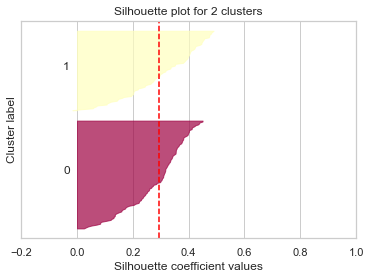

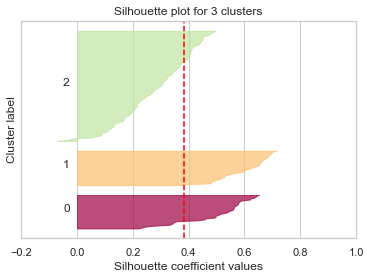

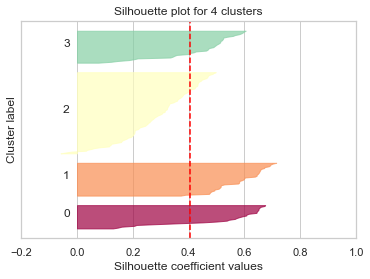

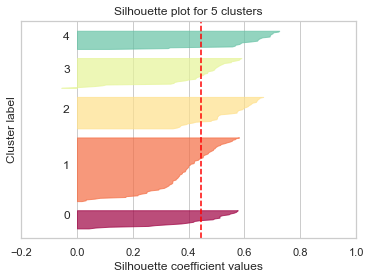

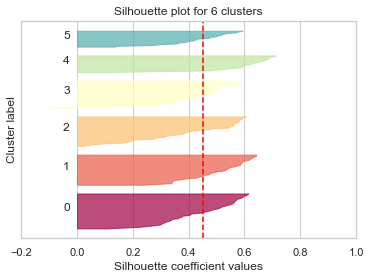

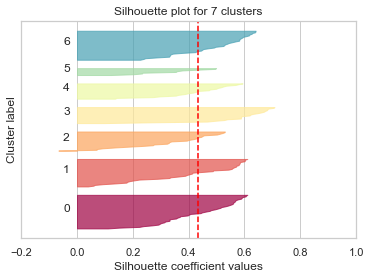

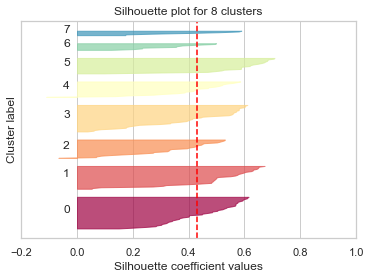

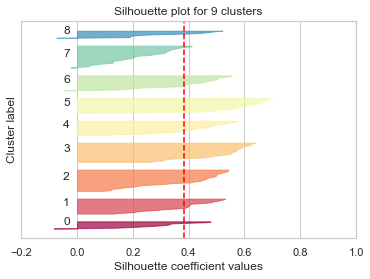

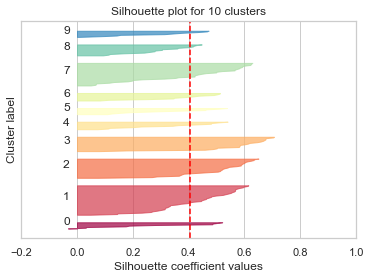

In [52]:
for k in k_range:
    plot_silhouette(X, k)

In [53]:
optimal_k = silhouette_df['Number of Clusters'][silhouette_df['Silhouette Score'].idxmax()]
optimal_k

6

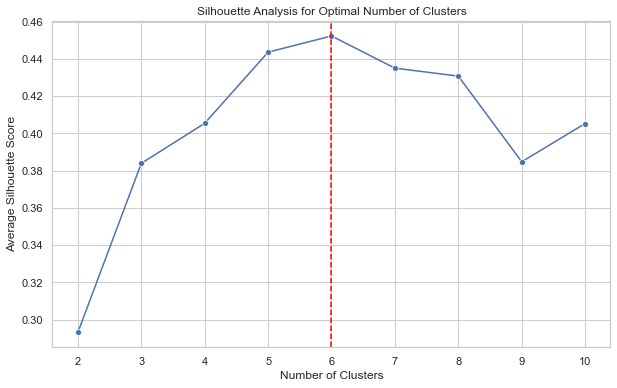

In [54]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Clusters', y='Silhouette Score', data=silhouette_df, marker='o')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal number of clusters (k={optimal_k})')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

In [55]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

In [56]:
X_scaled = np.ascontiguousarray(X_scaled)
X_scaled

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

In [57]:
def compute_gap_statistic(X, n_refs=50, max_clusters=10):
    shape = X.shape
    gaps = np.zeros(max_clusters)
    std_devs = np.zeros(max_clusters)
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=25, max_iter=300, random_state=123)
        kmeans.fit(X)
        cluster_labels = kmeans.labels_
        Wk = np.log(sum(np.min(pairwise_distances(X, kmeans.cluster_centers_, metric='euclidean'), axis=1)) / X.shape[0])
        Wk_refs = np.zeros(n_refs)
        for i in range(n_refs):
            random_reference = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), size=shape)
            random_reference = np.ascontiguousarray(random_reference)
            kmeans.fit(random_reference)
            Wk_refs[i] = np.log(sum(np.min(pairwise_distances(random_reference, kmeans.cluster_centers_, metric='euclidean'), axis=1)) / random_reference.shape[0])
        gaps[k - 1] = np.mean(Wk_refs) - Wk
        std_devs[k - 1] = np.sqrt(np.mean((Wk_refs - np.mean(Wk_refs)) ** 2))
    return gaps, std_devs

In [58]:
k_max = 10
B = 50
gaps, std_devs = compute_gap_statistic(X_scaled, n_refs=B, max_clusters=k_max)
gaps, std_devs

(array([0.16379183, 0.2533464 , 0.2443531 , 0.29955308, 0.31192936,
        0.33341916, 0.36216157, 0.35451167, 0.35931845, 0.35769403]),
 array([0.01817444, 0.02147192, 0.02376964, 0.02324724, 0.02236552,
        0.02202505, 0.01689244, 0.02418108, 0.01926595, 0.01914569]))

In [59]:
gap_stat_df = pd.DataFrame({
    'Number of Clusters': np.arange(1, k_max + 1),
    'Gap Statistic': gaps,
    'Standard Deviation': std_devs
})
gap_stat_df

,Number of Clusters,Gap Statistic,Standard Deviation
0,1,0.163792,0.018174
1,2,0.253346,0.021472
2,3,0.244353,0.023770
3,4,0.299553,0.023247
4,5,0.311929,0.022366
5,6,0.333419,0.022025
6,7,0.362162,0.016892
7,8,0.354512,0.024181
8,9,0.359318,0.019266
9,10,0.357694,0.019146


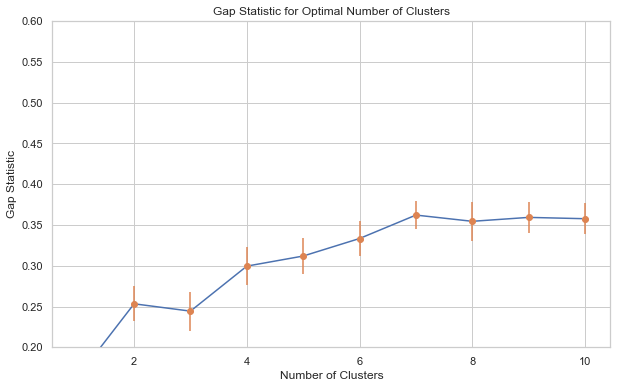

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Clusters', y='Gap Statistic', data=gap_stat_df, marker='o')
plt.errorbar(gap_stat_df['Number of Clusters'], gap_stat_df['Gap Statistic'], yerr=gap_stat_df['Standard Deviation'], fmt='o')
plt.title('Gap Statistic for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Statistic')
plt.ylim(0.2, 0.6)
plt.yticks(np.arange(0.2, 0.65, 0.05))
plt.grid(True)
plt.show()

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=50, max_iter=100, algorithm='auto', random_state=123)
kmeans.fit(X_scaled)
print("K-means clustering with 6 clusters of sizes:")
for i, size in enumerate(pd.Series(kmeans.labels_).value_counts().sort_index()):
    print(f"Cluster {i+1}: {size}")
print("\nCluster means:")
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i+1}: {centroid}")
print("\nClustering vector:")
print(kmeans.labels_)

K-means clustering with 6 clusters of sizes:
Cluster 1: 45
Cluster 2: 33
Cluster 3: 24
Cluster 4: 21
Cluster 5: 39
Cluster 6: 38

Cluster means:
Cluster 1: [ 1.25472096 -0.24021294 -0.04399777]
Cluster 2: [ 0.22171558  1.08322527 -1.29005223]
Cluster 3: [-0.97602698 -1.32549704  1.0371827 ]
Cluster 4: [ 0.47895722 -1.30822992 -1.19644353]
Cluster 5: [-0.44191719  0.99158305  1.23950275]
Cluster 6: [-0.87309844 -0.11378508 -0.09358039]

Clustering vector:
[2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 0 2 3 2 3 2 0 5 5 5 0 5 5 0 0 0 0 0 5 0 0 5 0 0 0 5 0 0 5 5 0 0 0 0
 0 5 0 5 5 0 0 5 0 0 5 0 0 5 5 0 0 5 0 5 5 5 0 5 0 5 5 0 0 5 0 5 0 0 0 0 0
 5 5 5 5 5 0 0 0 0 5 5 5 4 5 4 1 4 1 4 1 4 5 4 1 4 1 4 5 4 1 4 5 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [63]:
pcclust = pca.fit(X_scaled)
pcclust

PCA(n_components=3)

In [64]:
print("Summary of PCA:")
print(pd.DataFrame({
    'Standard deviation': np.sqrt(pcclust.explained_variance_),
    'Proportion of Variance': pcclust.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pcclust.explained_variance_ratio_)
}, index=np.arange(1, pca.n_components_ + 1)))
print("\nRotation Matrix (first two principal components):")
print(pd.DataFrame(pcclust.components_.T[:, :2], index=customer_data.columns[2:5], columns=['PC1', 'PC2']))

Summary of PCA:
   Standard deviation  Proportion of Variance  Cumulative Proportion
1            1.155274                0.442662               0.442662
2            1.002134                0.333084               0.775745
3            0.822280                0.224255               1.000000

Rotation Matrix (first two principal components):
                             PC1       PC2
Age                     0.706382  0.030141
Annual Income (k$)     -0.048024  0.998832
Spending Score (1-100) -0.706199 -0.037775


In [65]:
kmeans = KMeans(n_clusters=optimal_k, random_state=1)

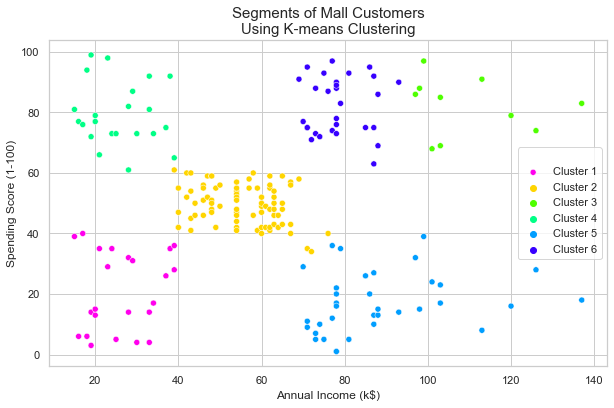

In [66]:
customer_data['cluster'] = kmeans.fit_predict(customer_data[['Annual Income (k$)', 'Spending Score (1-100)']])
palette = sns.color_palette("hsv", 6)
cluster_labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6"]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette=palette)
plt.title('Segments of Mall Customers\nUsing K-means Clustering', fontsize=15)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title=' ', labels=cluster_labels)
plt.grid(True)
plt.show()

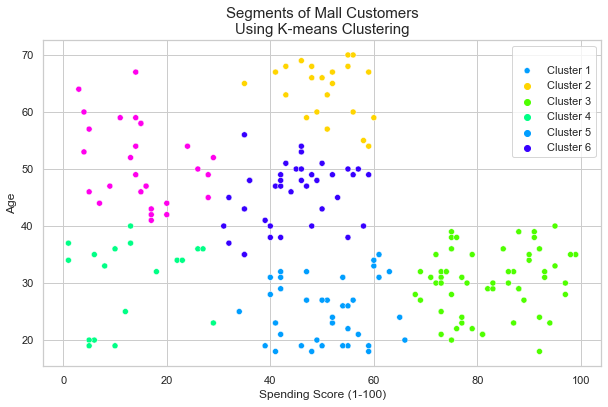

In [67]:
customer_data['cluster'] = kmeans.fit_predict(customer_data[['Spending Score (1-100)', 'Age']])
palette = sns.color_palette("hsv", 6)
cluster_labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6"]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Spending Score (1-100)', y='Age', hue='cluster', palette=palette)
plt.title('Segments of Mall Customers\nUsing K-means Clustering', fontsize=15)
plt.xlabel('Spending Score (1-100)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title=' ', labels=cluster_labels)
plt.grid(True)
plt.show()

In [68]:
customer_data['cluster'] = kmeans.fit_predict(customer_data[['Annual Income (k$)', 'Spending Score (1-100)']])
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [69]:
customer_data['PC1'], customer_data['PC2'] = pca.fit_transform(customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]).T
customer_data['PC1'], customer_data['PC2']

(0     -46.903574
 1     -35.924389
 2     -54.564848
 3     -36.004798
 4     -44.711709
          ...    
 195    64.901741
 196    57.361242
 197    69.386064
 198    65.364660
 199    82.356255
 Name: PC1, Length: 200, dtype: float64,
 0       1.099247
 1      41.638826
 2     -31.014689
 3      37.516505
 4       1.541657
          ...    
 195    12.260408
 196   -38.534679
 197     5.865813
 198   -51.062460
 199    11.677365
 Name: PC2, Length: 200, dtype: float64)

In [70]:
def kCols(vec):
    unique_vals = np.unique(vec)
    cols = sns.color_palette("husl", len(unique_vals))  # Adjust the palette as needed
    return [cols[i] for i in vec]

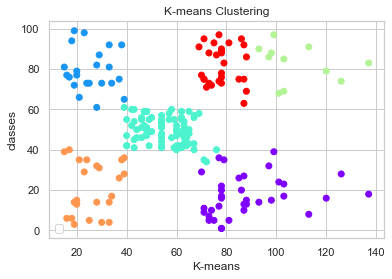

In [71]:
pcclust = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=6)
kmeans.fit(pcclust)
digCluster = kmeans.labels_
def color_mapper(cluster_labels):
    colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, len(np.unique(cluster_labels))))
    return colors[cluster_labels]
colors = color_mapper(digCluster)
plt.scatter(pcclust.iloc[:, 0], pcclust.iloc[:, 1], c=colors, marker='o')
plt.xlabel("K-means")
plt.ylabel("classes")
plt.title("K-means Clustering")
unique_colors = np.unique(colors)
legend_labels = [str(i) for i in range(len(unique_colors))]
plt.legend(unique_colors, legend_labels, loc="lower left")
plt.show()

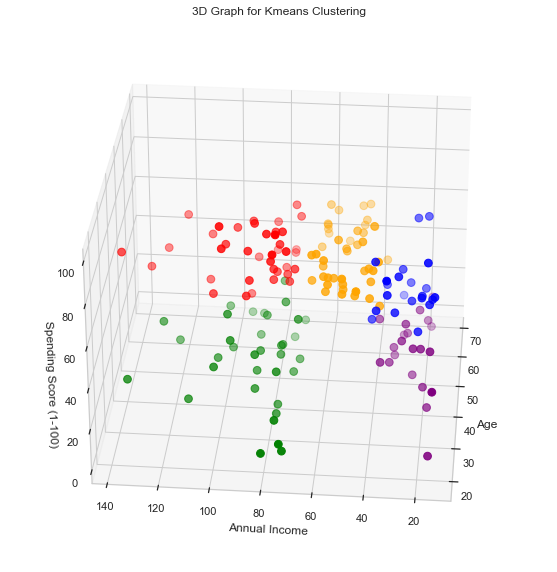

In [72]:
clusters = kmeans.fit_predict(X)
customer_data['label'] = clusters
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(customer_data.Age[customer_data.label == 0], customer_data['Annual Income (k$)'][customer_data.label == 0], customer_data['Spending Score (1-100)'][customer_data.label == 0], c = 'blue', s = 60)
ax.scatter(customer_data.Age[customer_data.label == 1], customer_data['Annual Income (k$)'][customer_data.label == 1], customer_data['Spending Score (1-100)'][customer_data.label == 1], c = 'red', s = 60)
ax.scatter(customer_data.Age[customer_data.label == 2], customer_data['Annual Income (k$)'][customer_data.label == 2], customer_data['Spending Score (1-100)'][customer_data.label == 2], c = 'green', s = 60)
ax.scatter(customer_data.Age[customer_data.label == 3], customer_data['Annual Income (k$)'][customer_data.label == 3], customer_data['Spending Score (1-100)'][customer_data.label == 3], c = 'orange', s = 60)
ax.scatter(customer_data.Age[customer_data.label == 4], customer_data['Annual Income (k$)'][customer_data.label == 4], customer_data['Spending Score (1-100)'][customer_data.label == 4], c = 'purple', s = 60)
ax.view_init(30,185)
plt.title('3D Graph for Kmeans Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')
plt.show()